# Lab 07-5 Fashion MNIST introduction
* https://www.tensorflow.org/tutorials/keras/basic_classification
### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.set_random_seed(777)  # for reproducibility
print(tf.__version__)

1.12.0


### 강의에 설명할 Data입니다
* Tensorflow 2.0 버전에 맞게 Keras를 활용한 Fashion MNIST를 분류 모델 생성

## 학습에 쓰이는 Data
| Label | Class       
| :------------- | :----------: 
| 0     | T-shirt/top 
| 1 | Trouser 
| 2 | Pullover 
| 3 | Dress
| 4 | Coat
| 5 | Sandal
| 6 | Shirt
| 7 | Sneaker
| 8 | Bag
| 9 | Ankle boot

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

*  Fashion MNIST Data 확인 - 4번째 배열 드레스

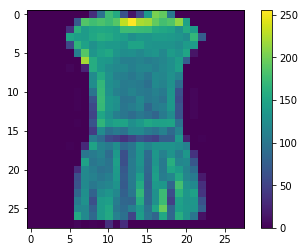

In [3]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

###  Tensorflow Keras
#### 위 Data를 기준으로 분류 모델을 만들도록 하겠습니다
* 0~1사이의 값으로 정규화 및 Data 출력

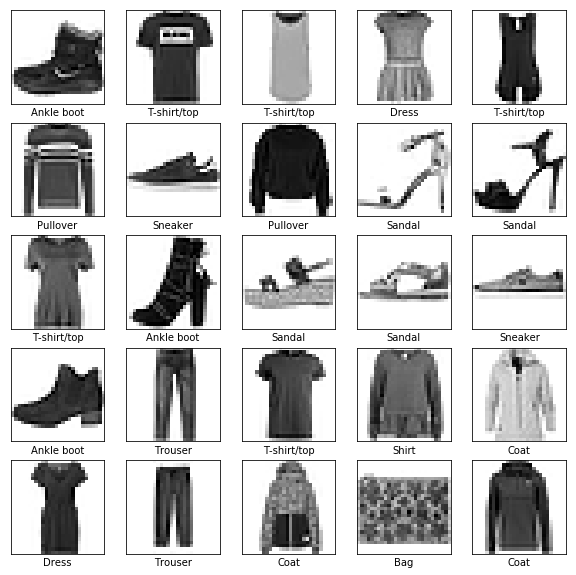

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

* Tensorflow keras API를 통해 모델에 대한 정의


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer과 Cross Entropy Loss 선언
* 5 Epoch로 학습할 Data로 학습 수행

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.4998 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3772 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3376 - acc: 0.8752
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3129 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2952 - acc: 0.8922


* 모델을 평가할 Test 데이타에 대한 정의

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.8731
